In [2]:
x = [
    [1, 2],
    [2, 1],
    [2, 3],
    [3, 1],
    [4, 3],
    [5, 4],
    [5, 5],
    [6, 4],
    [7, 5],
    [6, 6]
]

y = [-1, -1, -1, -1, +1, +1, +1, +1, +1, +1]


In [8]:
def predictions(theta, theta_0, data, labels):
    predicted_labels = []
    for i in range(len(data)):
        value = 0
        for j in range(len(theta)):
            value += theta[j]*data[i][j]
        if value + theta_0 >= 0:
            predicted_labels.append(1)
        else:
            predicted_labels.append(-1)
    return predicted_labels

def Loss(theta, theta_0, data, labels):
    error = 0
    predicted_labels = predictions(theta, theta_0, data, labels)
    for i in range(len(labels)):
        if predicted_labels[i] == labels[i]:
            error += 0
        else:
            error += 1
    return error

def PERCEPTRON(theta, theta_0, data, labels, epochs):
    mistakes = 0
    for _ in range(epochs):
        for i in range(len(data)):
            value = 0
            for j in range(len(theta)):
                value += theta[j]* data[i][j]
            error =  Loss(theta, theta_0, data, labels)
            if error == 0:
                break
            elif ((labels[i]*value+ theta_0)) <= 0:
                for j in range(len(theta)):
                    theta[j] = theta[j] + labels[i]*data[i][j]
                theta_0 = theta_0 + labels[i]
                mistakes += 1
    return theta, theta_0, mistakes


In [10]:
theta = [0,0]
theta_0 = 0

theta, theta_0, mistakes= PERCEPTRON(theta, theta_0, x, y, 500)

print(theta, theta_0, mistakes)
print(Loss(theta, theta_0, x, y))
print(predictions(theta, theta_0, x, y))

[7, -2] -21 59
0
[-1, -1, -1, -1, 1, 1, 1, 1, 1, 1]


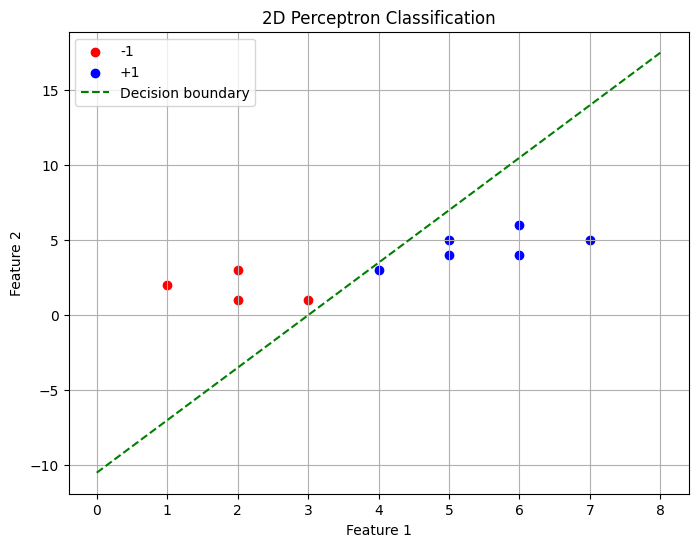

In [7]:
import matplotlib.pyplot as plt

# Separate points for plotting
x_pos = [x[i][0] for i in range(len(x)) if y[i] == 1]
y_pos = [x[i][1] for i in range(len(x)) if y[i] == 1]
x_neg = [x[i][0] for i in range(len(x)) if y[i] == -1]
y_neg = [x[i][1] for i in range(len(x)) if y[i] == -1]

plt.figure(figsize=(8,6))

# Scatter plot
plt.scatter(x_neg, y_neg, color='red', label='-1')
plt.scatter(x_pos, y_pos, color='blue', label='+1')

# Decision boundary: theta[0]*x1 + theta[1]*x2 + theta_0 = 0
# Solve for x2: x2 = -(theta[0]*x1 + theta_0) / theta[1]
x_vals = [min(x_neg + x_pos)-1, max(x_neg + x_pos)+1]
y_vals = [-(theta[0]*x + theta_0)/theta[1] for x in x_vals]
plt.plot(x_vals, y_vals, color='green', linestyle='--', label='Decision boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Perceptron Classification')
plt.legend()
plt.grid(True)
plt.show()